In [1]:
#Test koneksi via LED
import dodoku
import time

conn = dodoku.MDCLab()

print('Test LED blink')
conn.LED(100)

for i in (0,100,0,100,0,100):
    time.sleep(0.5)
    conn.LED(i)
print('Koneksi baik: ' + str(i)+' %')

Koneksi serial . . . 
Terhubung di port: /dev/cu.wchusbserial1410
Test LED blink
Koneksi baik: 100 %


In [29]:
#Test motor DC 
import dodoku
import numpy as np
import time

# set koneksi ke wemos
conn = dodoku.MDCLab()
print('LED Indikator ON')
conn.LED(50)
    
# Set kecepatan awal, setpoint, waktu
kec = 0
sp  = 180
awal = time.time()

## PID parameter
kp = 0.1  
ki = 0.1   
kd = 0.0  
    
# set durasi percobaan dan jumlah loop
run_time = 1.0
loops = int(60.0*run_time)
    
#siapkan tempat untuk semua påarameter yang akan di simpan
waktu   = np.zeros(loops)
s_p     = np.ones(loops)*sp
c_v     = np.zeros(loops)
error   = np.zeros(loops)
aktuasi = np.zeros(loops)

for i in range (1, loops):
        
    # menyimpan waktu tiap iterasi
    skrg = time.time()
    waktu[i] = skrg - awal
        
    # baca kecepatan current value
    c_v[i] = conn.KC1
    
    # Hitung error
    error[i] = sp - c_v[i]
    
    #Perhitungan PID
    PID = kp*error[i] + (error[i]-error[i-1])*kd + (sum(error))*ki
        
    # kirim sinyal aktuasi
    conn.U1(PID)
    conn.LED(PID)
            
    aktuasi[i] = int(PID)
    kec = PID
    # Turn on Heaters (0-100%)
    print('Waktu: '+str(int(waktu[i]))+' Speed Now: '+str(c_v[i])+' rpm, Sinyal kontrol: '+str(int(kec))+' %, error: '+str(error[i]))
    # Sleep (sec)
    #time.sleep(1.0)
        
time.sleep(2.0)
print('Percobaan selesai')
time.sleep(2.0)
# Turn Off 
print('Matikan Kecepataan')
conn.U1(0.0)
 

Koneksi serial . . . 
Terhubung di port: /dev/cu.wchusbserial1410
LED Indikator ON
Waktu: 0 Speed Now: 0.0 rpm, Sinyal kontrol: 36 %, error: 180.0
Waktu: 1 Speed Now: 99.0 rpm, Sinyal kontrol: 34 %, error: 81.0
Waktu: 2 Speed Now: 90.0 rpm, Sinyal kontrol: 44 %, error: 90.0
Waktu: 3 Speed Now: 114.0 rpm, Sinyal kontrol: 48 %, error: 66.0
Waktu: 4 Speed Now: 123.0 rpm, Sinyal kontrol: 53 %, error: 57.0
Waktu: 5 Speed Now: 132.0 rpm, Sinyal kontrol: 57 %, error: 48.0
Waktu: 6 Speed Now: 147.0 rpm, Sinyal kontrol: 58 %, error: 33.0
Waktu: 7 Speed Now: 147.0 rpm, Sinyal kontrol: 62 %, error: 33.0
Waktu: 9 Speed Now: 147.0 rpm, Sinyal kontrol: 65 %, error: 33.0
Waktu: 10 Speed Now: 150.0 rpm, Sinyal kontrol: 68 %, error: 30.0
Waktu: 11 Speed Now: 159.0 rpm, Sinyal kontrol: 69 %, error: 21.0
Waktu: 12 Speed Now: 162.0 rpm, Sinyal kontrol: 70 %, error: 18.0
Waktu: 13 Speed Now: 168.0 rpm, Sinyal kontrol: 71 %, error: 12.0
Waktu: 14 Speed Now: 171.0 rpm, Sinyal kontrol: 72 %, error: 9.0
Waktu:

0.0

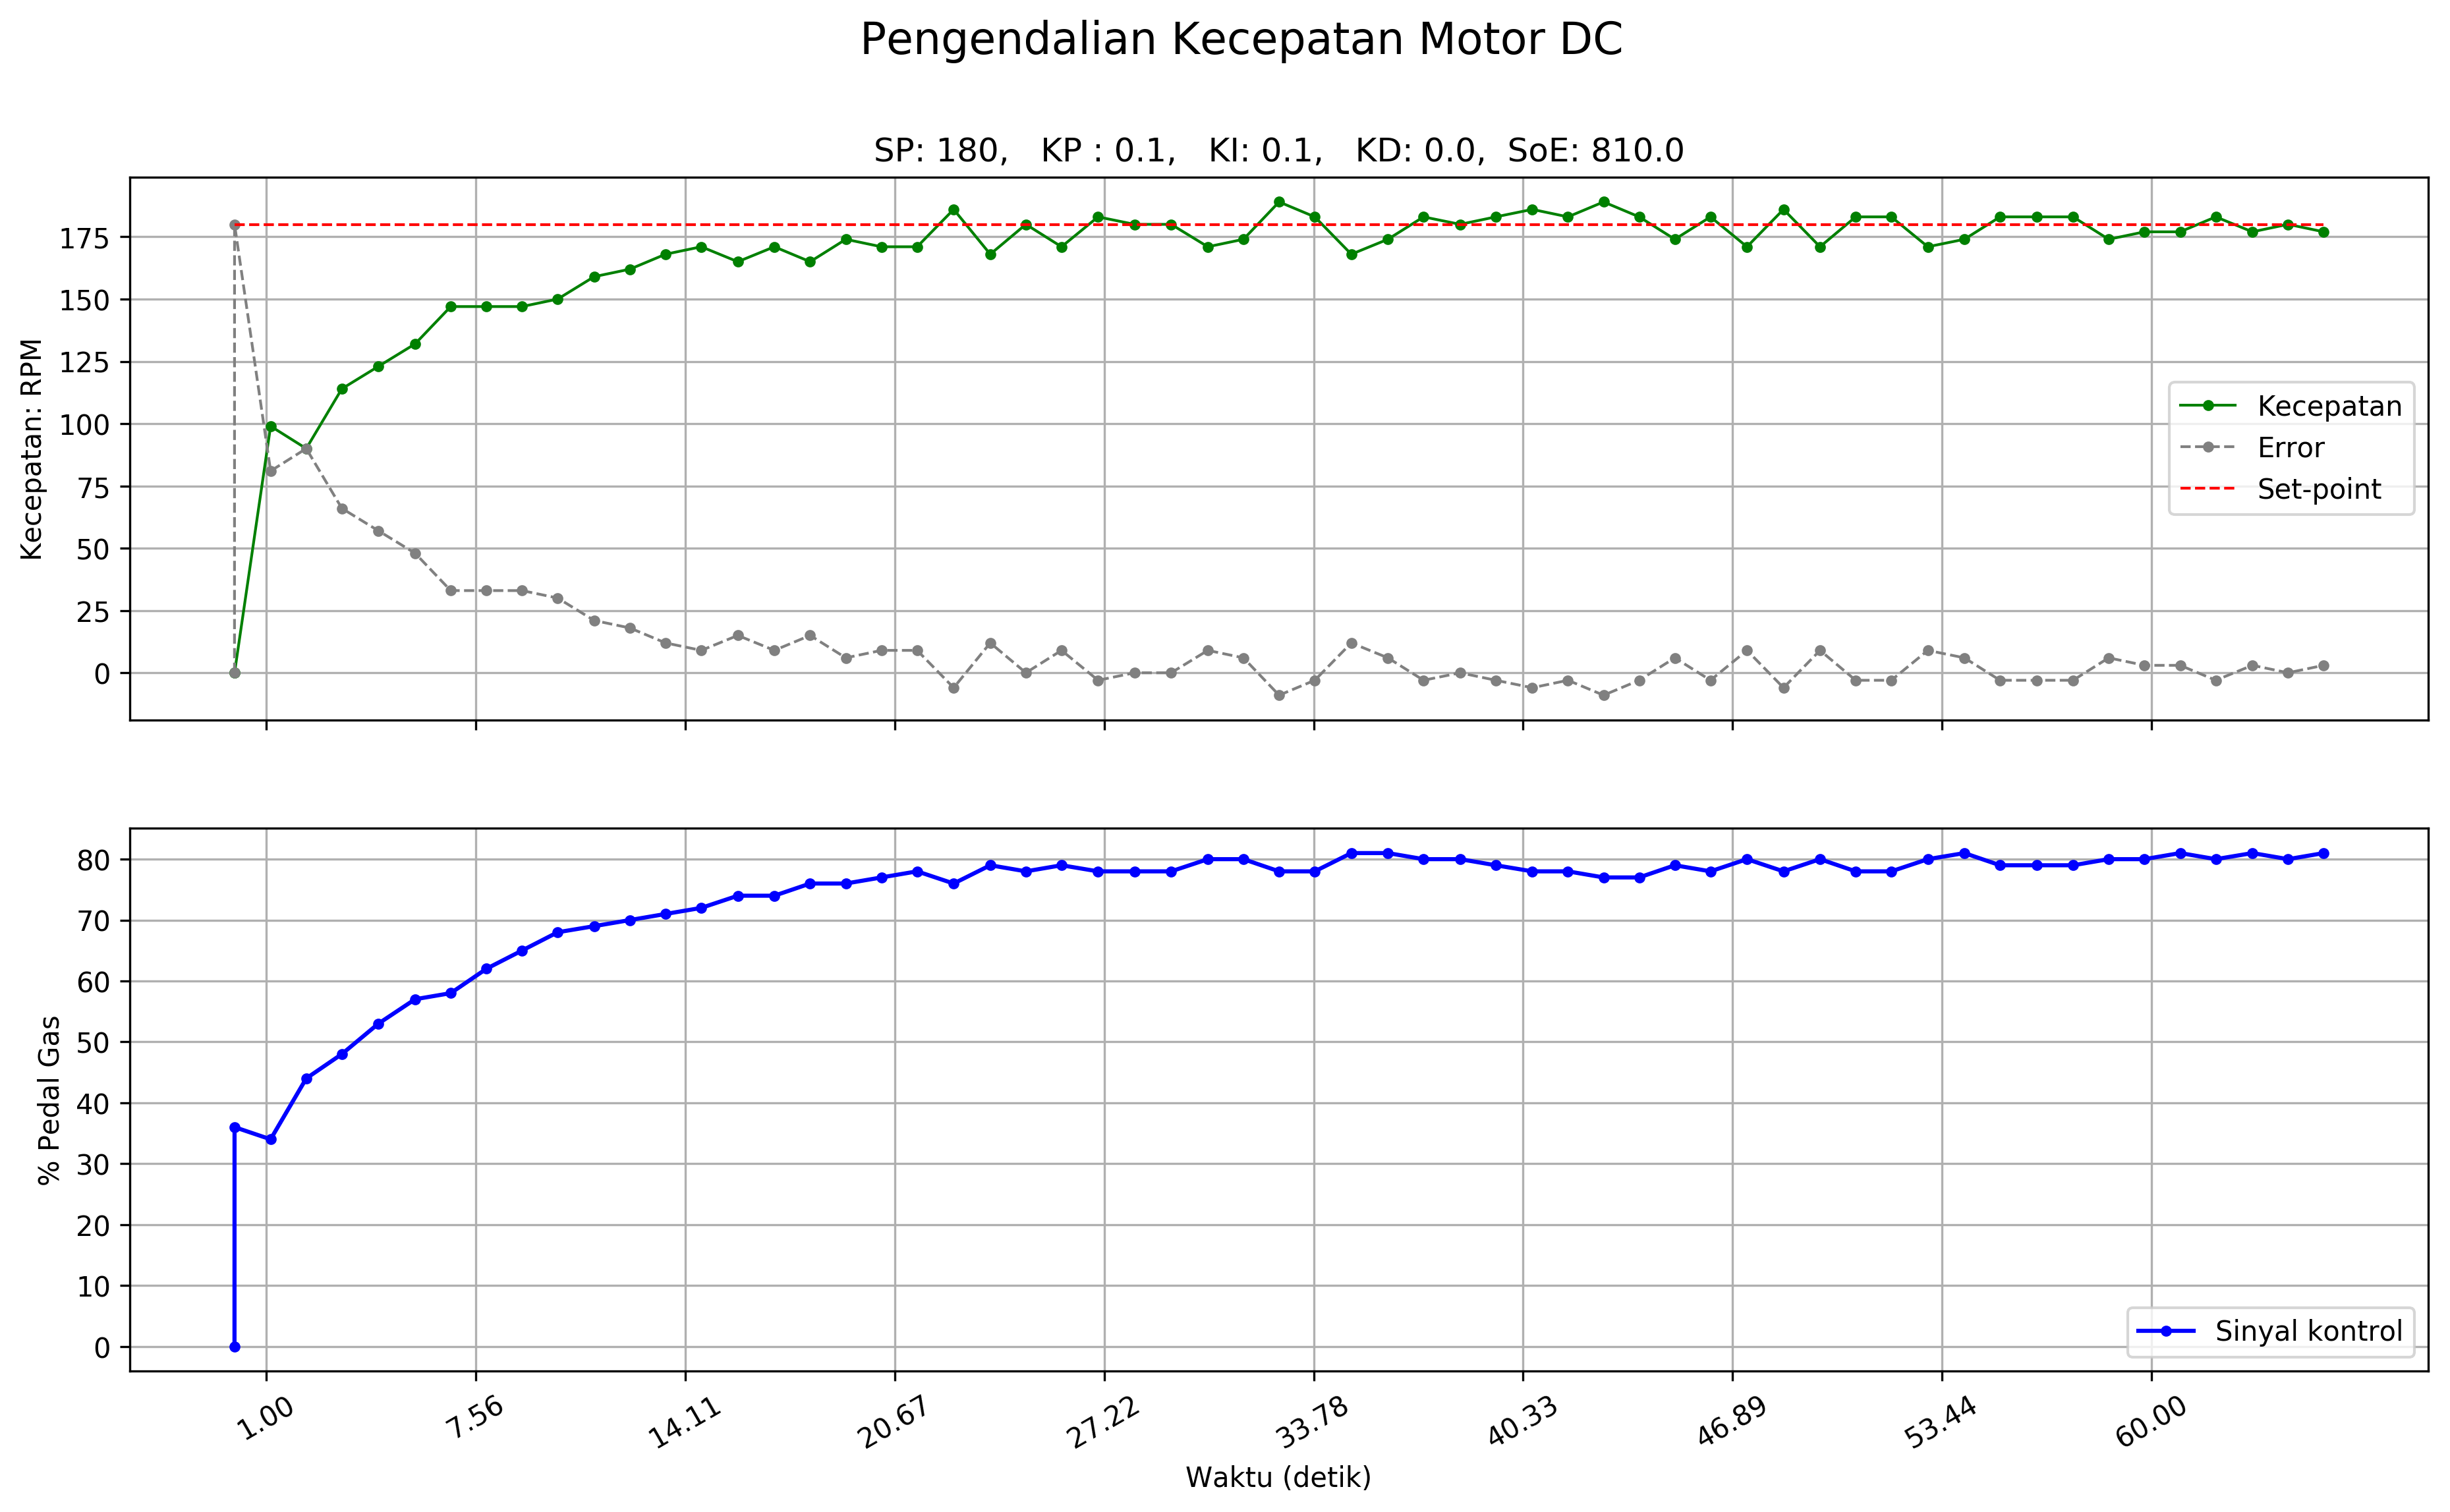

In [31]:
import matplotlib.pyplot as plt
%matplotlib inline

# plot results
fig= plt.figure(figsize=(15,8), dpi=300)
fig.suptitle('Pengendalian Kecepatan Motor DC' , fontsize=16)

plt.subplot(2,1,1)
plt.title('SP: '+str(sp)+',   KP : '+str(kp)+',   KI: '+str(ki)+',   KD: '+str(kd)+',  SoE: '+str(sum(error)))
plt.gca().grid(True)
plt.plot(waktu, c_v, color="green", linewidth=1, marker=".", label="Kecepatan")
plt.plot(waktu, error , color="grey", linewidth=1, marker=".", linestyle="--", label="Error")
plt.plot(waktu, s_p , color="red", linewidth=1, linestyle="--", label="Set-point")
plt.ylabel('Kecepatan: RPM')
plt.legend(loc='best', frameon=True)
plt.xticks(np.linspace(1,len(waktu),10,endpoint=True))
plt.tick_params(labelbottom='off')  

plt.subplot(2,1,2)
plt.gca().grid(True)
# select both y axis and x axis
#gridlines = plt.gca().get_xgridlines() + plt.gca().get_ygridlines()
plt.plot(waktu, aktuasi , color="blue",  marker=".", linewidth=1.5, label="Sinyal kontrol")
plt.ylabel('% Pedal Gas')    
plt.xlabel('Waktu (detik)')
plt.xticks(waktu, rotation=30)
plt.xticks(np.linspace(1,len(waktu),10,endpoint=True))
plt.legend(loc='lower right', frameon=True)

plt.savefig('mdc-pid-sp-180-11.png', dpi=500, facecolor='w', edgecolor='w',
        orientation='portrait', papertype='legal', format=None,
        transparent=False, bbox_inches='tight', pad_inches=0.1,
        frameon=True)
plt.show()


In [30]:
sum(error)

810.0

In [ ]:
conn.U1(0)